In [1]:
import tensorflow as tf
import numpy as np
# import pandas as pd
import glob
import matplotlib.pyplot as plt
# import seaborn as sns
# from resizeimage import resizeimage
%matplotlib inline
# tf.logging.set_verbosity(tf.logging.INFO)

/home/jeromekafrouni/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
ls ../data

README.md  pets.zip         pets_neuralnet_original/     zipcode/
__MACOSX/  pets_neuralnet/  pets_neuralnet_original.zip


# Neural net v2: using ImageDataGenerator to load and preprocess

## Prepare folder for train/test sets, in keras format

In [4]:
import os
import shutil

In [5]:
ls ../data

README.md  pets.zip         pets_neuralnet_original/     zipcode/
__MACOSX/  pets_neuralnet/  pets_neuralnet_original.zip


In [8]:
original_dataset_dir = '../data/pets_neuralnet_original'

In [6]:
base_dir = '../data/pets_neuralnet'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

In [7]:
# cats_filenames = [file for file in glob.glob(original_dataset_dir + '/cat/*')]

In [8]:
# dogs_filenames = [file for file in glob.glob(original_dataset_dir + '/dog/*')]

In [9]:
# for fname in cats_filenames[:521]: # 80 % split
#     name = fname.split('/')[-1]
#     shutil.copyfile(fname, os.path.join(train_cats_dir, name))
    
# for fname in cats_filenames[521:]: # 80 % split
#     name = fname.split('/')[-1]
#     shutil.copyfile(fname, os.path.join(validation_cats_dir, name))
    
# for fname in dogs_filenames[:1078]: # 80 % split
#     name = fname.split('/')[-1]
#     shutil.copyfile(fname, os.path.join(train_dogs_dir, name))
    
# for fname in dogs_filenames[1078:]: # 80 % split
#     name = fname.split('/')[-1]
#     shutil.copyfile(fname, os.path.join(validation_dogs_dir, name))

In [10]:
# from shutil import copyfile
# !mkdir ../data/pets_neuralnet
# !mkdir ../data/pets_neuralnet/cat
# !mkdir ../data/pets_neuralnet/dog

In [11]:
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
eval_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [12]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,)

In [13]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=128,
        class_mode='binary')

Found 1599 images belonging to 2 classes.


In [14]:
eval_generator = eval_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 401 images belonging to 2 classes.


Visualize the data augmentation:

In [ ]:
itr = 0
for data_batch, labels_batch in train_generator:
    itr += 1
    plt.imshow(data_batch[0])
    plt.show()
    if itr > 5:
        break

Define model:

In [15]:
layers = tf.keras.layers # built-in keras from tensorflow
models = tf.keras.models

model = models.Sequential()
# model.add(layers.Reshape((113, 113, 3), input_shape=(38307,)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # this is the "keep prob"
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [56]:
# model.fit(X_train, y_train, batch_size=128, epochs=10)

In [19]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=eval_generator,
      validation_steps=50)

Epoch 1/5
100/100 [==============================]100/100 [==============================] - 73s 728ms/step - loss: 0.3770 - acc: 0.8372 - val_loss: 0.3145 - val_acc: 0.8720

Epoch 2/5
100/100 [==============================]100/100 [==============================] - 72s 716ms/step - loss: 0.3553 - acc: 0.8441 - val_loss: 0.3625 - val_acc: 0.8675

Epoch 3/5
100/100 [==============================]100/100 [==============================] - 71s 711ms/step - loss: 0.3489 - acc: 0.8478 - val_loss: 0.3379 - val_acc: 0.8572

Epoch 4/5
100/100 [==============================]100/100 [==============================] - 66s 656ms/step - loss: 0.3382 - acc: 0.8558 - val_loss: 0.3747 - val_acc: 0.8444

Epoch 5/5
100/100 [==============================]100/100 [==============================] - 73s 728ms/step - loss: 0.3277 - acc: 0.8590 - val_loss: 0.3163 - val_acc: 0.8900



Results:
- 75 % val acc without augmentation (got to 75 % then lower because of overfitting)
- around 89% with data augmentation and images of size 150x150
- around 86% with data augmentation and images of size 64x64 with less epochs

## Visualize results

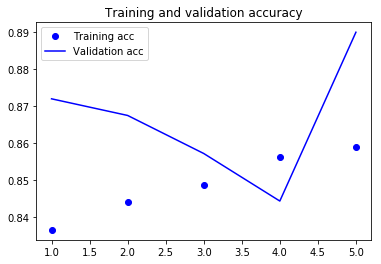

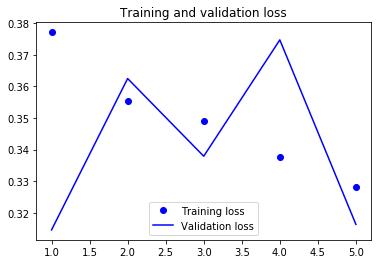

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Train model to import it to R

In [21]:
import h5py

In [22]:
model.save('cats_and_dogs_v1.h5')